## Actuarial Analysis

#### RAW ANALYSIS REPORT

### Introduction

> In these report, we are going to analyze the data for produce of 5 regions   
for use by `ABC SuperFarmer`, an insurance cover that insures farmers against a pre-set historical benchmark,  
in estimation of payouts for insurance claims.

### Data description

> The data is a spreadsheet from `ABC SuperFarmer`, consisting of columns: 

> * **Crop:** This column contains names of the insured crop 
> * **Block:** This column contains the interger codes of the 5 regions 1,2,3,4,5 insured by `ABC SuperFarmer`.
> * **Wet Weight:** This column contains the weights of fresh farm harvests in Kgs
> * **Dry Weight:** This column contains the weights of dried wet harvests
> * **Box length:** This column contains the measurement of length of placement boxes
> * **Box width:** This column contains the measurements of width of the placement boxes

> We also have secondary tables for the data, `The Benchmark Table`

|Block|Crop| Benchmark Yield(MT/Ha)| Sum Insured in millions$|
|-----|----|---------|--|
|1|Maize|3.4|7|
|2|Rice|2.63|23|
|3|Maize|3.84|17|
|4|Rice|3|3|
|5|Maize|1.5|40|


## Code instruction:

For reproducability of results, run code sequentially from top to bottom

## Assumptions used

> * Dry weight is 75% of wet weight in maize
> * Dry weight is 65% of wet weight in rice
> * dry weight cannot be greater than wet weight
> * 
> * 


We import the required libraries and load the data to start the data assessment.

In [1]:
import pandas as pd
import numpy as np

## Data Assessment

In [2]:
# We load insurance data to our notebook for assessment
raw_actuarial_data = pd.read_csv('agricultural_insurance_actuarial_data.csv')
# We display the first 5 rows
raw_actuarial_data.head()

,Crop,Block,Wet Weight,Dry Weight,Box Length,Box Width
0,Maize,1,12.510,11.57,8,5
1,Maize,1,NaN,0,8,5
2,Maize,1,4.295,2.61,8,5
3,Maize,1,13.810,11.88,8,5
4,Maize,1,NaN,0,8,5


In [3]:
# We use code to display the dimensions of the data
raw_actuarial_data.shape

(197, 6)

In [4]:
# We use code to display the dataset information for assessment
raw_actuarial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Crop        197 non-null    object 
 1   Block       197 non-null    int64  
 2   Wet Weight  182 non-null    float64
 3   Dry Weight  190 non-null    object 
 4   Box Length  197 non-null    int64  
 5   Box Width   197 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 9.4+ KB


In [5]:
# We use code to display the unique values in the dataset for each column
raw_actuarial_data.nunique()

Crop            4
Block           8
Wet Weight    178
Dry Weight    173
Box Length      4
Box Width       4
dtype: int64

In [6]:
# We use code to inspect the column names and check is they are standard names
raw_actuarial_data.columns

Index(['Crop', 'Block', 'Wet Weight', 'Dry Weight', 'Box Length',
       'Box Width '],
      dtype='object')

In [7]:
# We use code to display the names of items in the crop column
invalid_crops = {
'crop_name':pd.DataFrame(raw_actuarial_data['Crop'].value_counts().sort_index()).index,
'frequency':pd.DataFrame(raw_actuarial_data['Crop'].value_counts().sort_index()).Crop}
invalid_crops = pd.DataFrame(invalid_crops)
invalids = ['Cotton','Potato']
highlight = np.where(invalid_crops.index.isin(invalids),
                                  'background-color: orange',
                                  'color: green')
invalid_crops = invalid_crops.style.apply(lambda _: highlight)
invalid_crops.hide(axis = 'index')

crop_name,frequency
Cotton,1
Maize,117
Potato,1
Rice,78


In [8]:
# We use code to display items values contained in the Block column against their frequency.
block_data = {'block':pd.DataFrame(raw_actuarial_data['Block'].value_counts().sort_index()).index,
              'frequency':pd.DataFrame(raw_actuarial_data['Block'].value_counts().sort_index()).Block}
block_data = pd.DataFrame(block_data)
block_data = block_data.reset_index()[['block','frequency']]

#block_data.style.set_properties(**{'background-color': 'white',
#                           'color': 'green'})
invalids = [7,10,55]
highlight = np.where(block_data['block'].isin(invalids),
                                  'background-color: orange',
                                  'color: green')
block_data = block_data.style.apply(lambda _: highlight)
block_data.hide(axis = 'index')

block,frequency
1,40
2,48
3,44
4,29
5,33
7,1
10,1
55,1


> * **Checking for invalid data**

## Data Assessment issues

> * **Data Quality Issues**
> * Q-1: The column names are not standard callable names for analysis, and are not desctiptive  
enough of the data in the fields. Some contain spaces after names.
> * Q-2: There are missing values in the wet weight column, and dry weight column
> * Q-3: Incorrect data type in the field dry weight, it is a string format instead of number,  
and there os an incorrect value of ` 40,000 ` that needs replacement.
> * Q-4: There are incorrect values in the block section of the table, valid values should range from 1-5
> * Q-5 there are invalid crops such as potatoes and cotton in the data, which should insure maize and rice


## Data Cleaning

## Issue Q-1:

> * Q-1: The column names are not standard callable names for analysis.

### Define

> * The column headings consist of spaces and interchanging cases which may not be the best for analysis.   
The names are also less descriptive.

## Code

In [9]:
# We use code to inspect the current column names
raw_actuarial_data.columns

Index(['Crop', 'Block', 'Wet Weight', 'Dry Weight', 'Box Length',
       'Box Width '],
      dtype='object')

In [10]:
# We use code to rename the columns to have more descriptive names
raw_actuarial_data.rename(columns = {'Crop':'crop_name', 
                                     'Block':'farmers_block',
                                     'Wet Weight': 'crop_wet_weight',
                                     'Dry Weight':'crop_dry_weight', 
                                     'Box Length':'box_length',
                                     'Box Width ': 'box_width'}, inplace = True)

## Test

In [11]:
# We use code to test if the changes were made.
raw_actuarial_data.head(2)

,crop_name,farmers_block,crop_wet_weight,crop_dry_weight,box_length,box_width
0,Maize,1,12.51,11.57,8,5
1,Maize,1,NaN,0,8,5


## Issue Q-3:

> * Q-3: Incorrect data type in the field dry weight, it is a string format instead of number.

## Define:

> For Q-3 The dry weight data should be numerical, hence we need to convert it to a numeric format

## Code

In [12]:
# Use code to display the incorrect data that would hinder conversion of the column to numeric
raw_actuarial_data['crop_dry_weight'][63]

' 40,000 '

In [13]:
# We use code to replace the value 63 in crop_dry_weight
raw_actuarial_data.loc[63,'crop_dry_weight'] = 40000

In [14]:
# We now change the dry weights from string to numeric 
#to allow arithmetic operations on the fields
raw_actuarial_data['crop_dry_weight'] = pd.to_numeric(raw_actuarial_data['crop_dry_weight'])

## Test

In [15]:
# We use code to confirm that the dry weights have been converted to numeric datatypes.
raw_actuarial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   crop_name        197 non-null    object 
 1   farmers_block    197 non-null    int64  
 2   crop_wet_weight  182 non-null    float64
 3   crop_dry_weight  190 non-null    float64
 4   box_length       197 non-null    int64  
 5   box_width        197 non-null    int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 9.4+ KB


## Issue Q-4:

>  * Q-4: There are incorrect values in the block section of the table, valid values should range from 1-5

## Define:

> For Q-4 we are to drop incorrect values in block field.

## Code:

In [16]:
# We use code to display items values contained in the Block column against their frequency.
block_data = pd.DataFrame(raw_actuarial_data['farmers_block'].value_counts().sort_index())
block_data = {
'farmers_block': block_data.index,
'frequency':block_data.farmers_block}
block_data = pd.DataFrame(block_data)
block_data = block_data.reset_index()[['farmers_block','frequency']]

#block_data.style.set_properties(**{'background-color': 'white',
#                           'color': 'green'})
invalids = [7,10,55]
highlight = np.where(block_data['farmers_block'].isin(invalids),
                                  'background-color: orange',
                                  'color: green')
block_data = block_data.style.apply(lambda _: highlight)
block_data.hide(axis = 'index')

farmers_block,frequency
1,40
2,48
3,44
4,29
5,33
7,1
10,1
55,1


In [17]:
# We use code to filter out the incorrect data values
raw_actuarial_data = raw_actuarial_data[raw_actuarial_data['farmers_block'] <= 5]

## Test

In [18]:
# We use code to display items values contained in the Block column against their frequency.
block_data = pd.DataFrame(raw_actuarial_data['farmers_block'].value_counts().sort_index())
block_data = {
'farmers_block':block_data.index,
'frequency':block_data.farmers_block}
block_data = pd.DataFrame(block_data)
block_data = block_data.reset_index()[['farmers_block','frequency']]

#block_data.style.set_properties(**{'background-color': 'white',
#                           'color': 'green'})
invalids = [7,10,55]
highlight = np.where(block_data['farmers_block'].isin(invalids),
                                  'background-color: orange',
                                  'color: green')
block_data = block_data.style.apply(lambda _: highlight)
block_data.hide(axis = 'index')

farmers_block,frequency
1,40
2,48
3,44
4,29
5,33


## Issue Q-5:

> * Q-5 there are invalid crops such as potatoes and cotton in the data, which should insure maize and rice

## Define:

> * For Q-5 there were invalid crops which are not part of the insured crops and needed to be removed.

## Code

In [19]:
# We use code to display the names of items in the crop column
invalid_crops = {
'crop_name':pd.DataFrame(raw_actuarial_data['crop_name'].value_counts().sort_index()).index,
'frequency':pd.DataFrame(raw_actuarial_data['crop_name'].value_counts().sort_index()).crop_name}
invalid_crops = pd.DataFrame(invalid_crops)
invalids = ['Cotton','Potato']
highlight = np.where(invalid_crops.index.isin(invalids),
                                  'background-color: orange',
                                  'color: green')
invalid_crops = invalid_crops.style.apply(lambda _: highlight)
invalid_crops.hide(axis = 'index')

crop_name,frequency
Cotton,1
Maize,116
Potato,1
Rice,76


In [20]:
# We use code to filter out cotton data
raw_actuarial_data = raw_actuarial_data[(raw_actuarial_data['crop_name'] != 'Cotton')]
# We use code to filter out Potato data
raw_actuarial_data = raw_actuarial_data[(raw_actuarial_data['crop_name'] != 'Potato')]

## Test

In [21]:
# We use code to display the names of items in the crop column
invalid_crops = {
'crop_name':pd.DataFrame(raw_actuarial_data['crop_name'].value_counts().sort_index()).index,
'frequency':pd.DataFrame(raw_actuarial_data['crop_name'].value_counts().sort_index()).crop_name}
invalid_crops = pd.DataFrame(invalid_crops)
invalids = ['Cotton','Potato']
highlight = np.where(invalid_crops.index.isin(invalids),
                                  'background-color: orange',
                                  'color: green')
invalid_crops = invalid_crops.style.apply(lambda _: highlight)
invalid_crops.hide(axis = 'index')

crop_name,frequency
Maize,116
Rice,76


## Issue Q-2:

> * Q-2: There are missing values in the wet weight column, and dry weight column

## Define: 

> * We investigate missing values in the columns wet weight and dry weight

## Code

In [22]:
#count missing values
raw_actuarial_data.crop_wet_weight.isna().sum()

15

There are 15 missing values in wet weight

In [23]:
#count missing values
raw_actuarial_data.crop_dry_weight.isna().sum()

7

> * there are 7 values missing for dry weight which need a 75% conversion for maize and 65% conversion for rice

In [24]:
#view missing values in wet weight
raw_actuarial_data.query('crop_wet_weight.isna()', engine = 'python')

,crop_name,farmers_block,crop_wet_weight,crop_dry_weight,box_length,box_width
1,Maize,1,NaN,0.0,8,5
4,Maize,1,NaN,0.0,8,5
6,Maize,1,NaN,0.0,8,5
9,Maize,1,NaN,0.0,8,5
10,Maize,1,NaN,0.0,8,5
16,Maize,1,NaN,0.0,8,5
17,Maize,1,NaN,0.0,8,5
20,Maize,1,NaN,0.0,8,5
28,Maize,1,NaN,0.0,8,5
30,Maize,1,NaN,0.0,8,5


> * Crops with missing wet weight have 0 dry weight too. These will be filled with 0   
since wet weight cannot exceede dry weight.

In [25]:
# We use code to fill the missing values with 0 where there 
#is missing values for wet weight and the dry weight is 0
raw_actuarial_data.crop_wet_weight.fillna(0,inplace = True)

In [26]:
# We use code to view the missing dry weights in the data
raw_actuarial_data.query('crop_dry_weight.isna()', engine = 'python')

,crop_name,farmers_block,crop_wet_weight,crop_dry_weight,box_length,box_width
72,Rice,2,3.360,NaN,8,5
85,Rice,2,10.760,NaN,8,5
87,Rice,2,2.540,NaN,8,5
95,Maize,3,22.020,NaN,8,5
112,Maize,3,4.385,NaN,8,5
125,Maize,3,2.895,NaN,8,5
133,Maize,3,9.700,NaN,8,5


> * Crops with missing dry weight have non-zero wet weights. Where a wet weight exits for Rice,  
the dry weight is 65% of the wet weight. Where the wet weight exists for Maize, the dry weight is   
75% of the wet weight.

In [27]:
#create list of missing values
na_list = [72,85,87,95,112,125,133]
#calculate and fill missing values
#define raw to horizontally shorten code for later printing
raw = raw_actuarial_data
for i in na_list:
    #print(i)
    if raw.loc[i,'crop_name'] == 'Rice':
       # print(raw_actuarial_data.loc[i,'crop_dry_weight'])
        raw.loc[i,'crop_dry_weight'] = raw.loc[i,'crop_wet_weight']*0.65
      #  print(raw_actuarial_data.loc[i,'crop_dry_weight'])
    if raw.loc[i,'crop_name'] == 'Maize':
       # print(raw_actuarial_data.loc[i,'crop_dry_weight'])
        raw.loc[i,'crop_dry_weight'] = raw.loc[i,'crop_wet_weight']*0.75
      #  print(raw_actuarial_data.loc[i,'crop_dry_weight'])
for i in na_list:
    print (f"Filled {raw.loc[i,'crop_name']} ",end = '') 
    print (f"dry weight from wet weight: {raw.loc[i,'crop_wet_weight']} ",end = '')
    print(f"as dry weight:{raw.loc[i,'crop_dry_weight']} ", end = '')
    percentage = (raw.loc[i,'crop_dry_weight']/raw.loc[i,'crop_wet_weight'])*100
    print(f"which is {percentage}% ")

Filled Rice dry weight from wet weight: 3.36 as dry weight:2.184 which is 65.0% 
Filled Rice dry weight from wet weight: 10.76 as dry weight:6.994 which is 65.0% 
Filled Rice dry weight from wet weight: 2.54 as dry weight:1.651 which is 65.0% 
Filled Maize dry weight from wet weight: 22.02 as dry weight:16.515 which is 75.0% 
Filled Maize dry weight from wet weight: 4.385 as dry weight:3.28875 which is 75.0% 
Filled Maize dry weight from wet weight: 2.895 as dry weight:2.17125 which is 75.0% 
Filled Maize dry weight from wet weight: 9.7 as dry weight:7.2749999999999995 which is 75.0% 


# Test

In [28]:
#we use code to check if the missing values were filled, by counting missing dry weight
raw_actuarial_data.crop_dry_weight.isna().sum()

0

In [29]:
# We use code to check if the missing values were filled, by counting missing wet weight
raw_actuarial_data.crop_wet_weight.isna().sum()

0

# Storing Data

At this stage we store the cleaned file in a spreadsheet file

In [30]:
# We rename the data from raw to refined refined data
refined_actuarial_data = raw_actuarial_data

In [31]:
#Store in a spreadsheet
refined_actuarial_data.to_csv('cleaned_actuarial_data.csv', index = False)

# Actuarial computations on the cleaned data

At this stage we do computation of the required information using the cleaned  
data for the next stage of analysis.
The purpose ofthe analysis is to compute:  
payout scale
yield attained in mt/ha
payouts
yield proportion
the payouts for each case ID and subsequently  
make analysis and visualizations to communicate findings.

In [32]:
# We use code to load the clean data to analyze
cleaned_data = pd.read_csv('cleaned_actuarial_data.csv')
cleaned_data.head()

,crop_name,farmers_block,crop_wet_weight,crop_dry_weight,box_length,box_width
0,Maize,1,12.510,11.57,8,5
1,Maize,1,0.000,0.00,8,5
2,Maize,1,4.295,2.61,8,5
3,Maize,1,13.810,11.88,8,5
4,Maize,1,0.000,0.00,8,5


## We apply the benchmark data to the yields dataset.

The Benchmark Table

|Block|Crop| Benchmark Yield(MT/Ha)| Sum Insured in millions$|
|-----|----|---------|--|
|1|Maize|3.4|7|
|2|Rice|2.63|23|
|3|Maize|3.84|17|
|4|Rice|3|3|
|5|Maize|1.5|40|

## Apply Benchmark Yield and Sum Insured

In [33]:
# We use code to apply benchmark yield to the data
# We create benchmark empty list
benchmark_yield_metric_t = []
# We create sum insured empty list
sum_insured_millions = []

#fill the lists with a loop
for i in cleaned_data.farmers_block:
    if i == 1:
        benchmark_yield_metric_t.append(3.4)
        sum_insured_millions.append(7)
    if i == 2:
        benchmark_yield_metric_t.append(2.63)
        sum_insured_millions.append(23)
    if i == 3:
        benchmark_yield_metric_t.append(3.84)
        sum_insured_millions.append(17)
    if i == 4:
        benchmark_yield_metric_t.append(3)
        sum_insured_millions.append(3)
    if i == 5:
        benchmark_yield_metric_t.append(1.5)
        sum_insured_millions.append(40)

In [34]:
# We use code to confirm unique values
benchmark_yield_metric_t
a_set = set(benchmark_yield_metric_t)
len(a_set)

5

In [35]:
# We use code to confirm unique values
sum_insured_millions
a_set = set(sum_insured_millions)
len(a_set)

5

### We append sum insured in millions and benchmark yield to our data

In [36]:
# We apply the sum insured data to the dataframe
cleaned_data['sum_insured_millions'] = sum_insured_millions
cleaned_data[['crop_name','farmers_block',
              'sum_insured_millions']].iloc[[1,30,60,180,90,140,160]]

,crop_name,farmers_block,sum_insured_millions
1,Maize,1,7
30,Maize,1,7
60,Rice,2,23
180,Maize,5,40
90,Maize,3,17
140,Rice,4,3
160,Maize,5,40


In [37]:
#We apply the benchmark yield in tonnes data to the dataframe
cleaned_data['benchmark_yield_tonnes'] = benchmark_yield_metric_t
cleaned_data[['crop_name','farmers_block',
              'benchmark_yield_tonnes']].iloc[[1,30,60,180,90,140,160]]

,crop_name,farmers_block,benchmark_yield_tonnes
1,Maize,1,3.40
30,Maize,1,3.40
60,Rice,2,2.63
180,Maize,5,1.50
90,Maize,3,3.84
140,Rice,4,3.00
160,Maize,5,1.50


### We compute actual yield and yield proportions and append to the dataframe

In [38]:
# We use code to compute the actual yield in kgs to actual yield in tonnes
cleaned_data['yield_attained_mt/ha'] = cleaned_data['crop_dry_weight']/1000

# We use code to compute the yield proportion as percentage
proportion = (cleaned_data['crop_dry_weight']/cleaned_data['benchmark_yield_tonnes'])*100
cleaned_data['yield_proportion_percentage'] = proportion

In [39]:
cleaned_data.iloc[[1,30,60,180,90,140,160]][['crop_name','benchmark_yield_tonnes',
            'yield_attained_mt/ha','yield_proportion_percentage']]

,crop_name,benchmark_yield_tonnes,yield_attained_mt/ha,yield_proportion_percentage
1,Maize,3.40,0.000000,0.000000
30,Maize,3.40,0.000000,0.000000
60,Rice,2.63,0.008700,330.798479
180,Maize,1.50,0.004825,321.666667
90,Maize,3.84,0.001728,45.000000
140,Rice,3.00,0.003445,114.833333
160,Maize,1.50,0.013980,932.000000


## Calculate payout

In [40]:
#set parameter values
trigger = 75
exit = 10
tsi_at_exit = 90

In [41]:
#compute payout scale and add to the dataframe
payout = (trigger - cleaned_data['yield_proportion_percentage'])/(trigger-exit)
cleaned_data['payout_scale'] = payout
for i in cleaned_data['payout_scale'].index:    
    if cleaned_data.loc[i,'payout_scale'] < 0:
        cleaned_data.loc[i,'payout_scale'] = 0

In [42]:
# We use code to view results
cleaned_data.head()[['crop_name','benchmark_yield_tonnes',
                     'yield_attained_mt/ha','yield_proportion_percentage',
                     'payout_scale']]

,crop_name,benchmark_yield_tonnes,yield_attained_mt/ha,yield_proportion_percentage,payout_scale
0,Maize,3.4,0.01157,340.294118,0.000000
1,Maize,3.4,0.00000,0.000000,1.153846
2,Maize,3.4,0.00261,76.764706,0.000000
3,Maize,3.4,0.01188,349.411765,0.000000
4,Maize,3.4,0.00000,0.000000,1.153846


In [43]:
# We use code to compute payout
# We create payouts empty dictionary
payout = []

for i in cleaned_data.index:
    if cleaned_data.yield_proportion_percentage[i] >= trigger:
        payout.append(0)
    if cleaned_data.yield_proportion_percentage[i] < trigger:
        value = cleaned_data.sum_insured_millions[i]*cleaned_data.payout_scale[i]
        payout.append(value)

In [44]:
# We append the payouts data to the dataframe
cleaned_data['payout_amount'] = payout

In [45]:
cleaned_data.iloc[[1,30,60,180,90,140,160]][['crop_name','benchmark_yield_tonnes',
                     'yield_attained_mt/ha','yield_proportion_percentage',
                     'payout_scale','payout_amount']]

,crop_name,benchmark_yield_tonnes,yield_attained_mt/ha,yield_proportion_percentage,payout_scale,payout_amount
1,Maize,3.40,0.000000,0.000000,1.153846,8.076923
30,Maize,3.40,0.000000,0.000000,1.153846,8.076923
60,Rice,2.63,0.008700,330.798479,0.000000,0.000000
180,Maize,1.50,0.004825,321.666667,0.000000,0.000000
90,Maize,3.84,0.001728,45.000000,0.461538,7.846154
140,Rice,3.00,0.003445,114.833333,0.000000,0.000000
160,Maize,1.50,0.013980,932.000000,0.000000,0.000000


In [46]:
# We create a final dataset containing all the computed data
cleaned_payouts_calculated_data = cleaned_data

In [47]:
# We use code to display the data
cleaned_payouts_calculated_data.iloc[[1,30,60,180,90,140,160]][['crop_name',
            'benchmark_yield_tonnes','yield_attained_mt/ha',
            'yield_proportion_percentage', 'payout_scale','payout_amount']]

,crop_name,benchmark_yield_tonnes,yield_attained_mt/ha,yield_proportion_percentage,payout_scale,payout_amount
1,Maize,3.40,0.000000,0.000000,1.153846,8.076923
30,Maize,3.40,0.000000,0.000000,1.153846,8.076923
60,Rice,2.63,0.008700,330.798479,0.000000,0.000000
180,Maize,1.50,0.004825,321.666667,0.000000,0.000000
90,Maize,3.84,0.001728,45.000000,0.461538,7.846154
140,Rice,3.00,0.003445,114.833333,0.000000,0.000000
160,Maize,1.50,0.013980,932.000000,0.000000,0.000000


In [48]:
cleaned_payouts_calculated_data.to_csv('cleaned_payouts_calculated_data.csv',index = False)

## Analysis of insights

> In this section we do exploratory data analysis to get insights from the cleaned, payouts calculated data

## Summary statistics

In [52]:
cleaned_payouts_calculated_data.describe()

,farmers_block,crop_wet_weight,crop_dry_weight,box_length,box_width,sum_insured_millions,benchmark_yield_tonnes,yield_attained_mt/ha,yield_proportion_percentage,payout_scale,payout_amount
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,1.920000e+02,192.000000,192.000000
mean,2.833333,9.145911,214.232901,8.114583,5.041667,18.223958,2.923073,0.214233,8.190957e+03,0.181523,2.015877
std,1.377962,7.934673,2886.334549,2.397074,1.143309,12.225064,0.780283,2.886335,1.097436e+05,0.345472,3.858601
min,1.000000,0.000000,0.000000,2.000000,1.000000,3.000000,1.500000,0.000000,0.000000e+00,0.000000,0.000000
25%,2.000000,3.783750,2.015000,8.000000,5.000000,7.000000,2.630000,0.002015,6.171875e+01,0.000000,0.000000
50%,3.000000,6.537500,3.432500,8.000000,5.000000,17.000000,3.000000,0.003432,1.122794e+02,0.000000,0.000000
75%,4.000000,12.302500,7.420000,8.000000,5.000000,23.000000,3.400000,0.007420,2.722656e+02,0.204327,2.522184
max,5.000000,40.070000,40000.000000,40.000000,20.000000,40.000000,3.840000,40.000000,1.520913e+06,1.153846,23.847616


## Claim payouts for each block

In [53]:
cleaned_payouts_calculated_data.groupby('farmers_block').sum()['payout_amount']

farmers_block
1    152.828054
2    128.642586
3    101.146935
4      4.430769
5      0.000000
Name: payout_amount, dtype: float64

## Average dry yields per block visualization

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

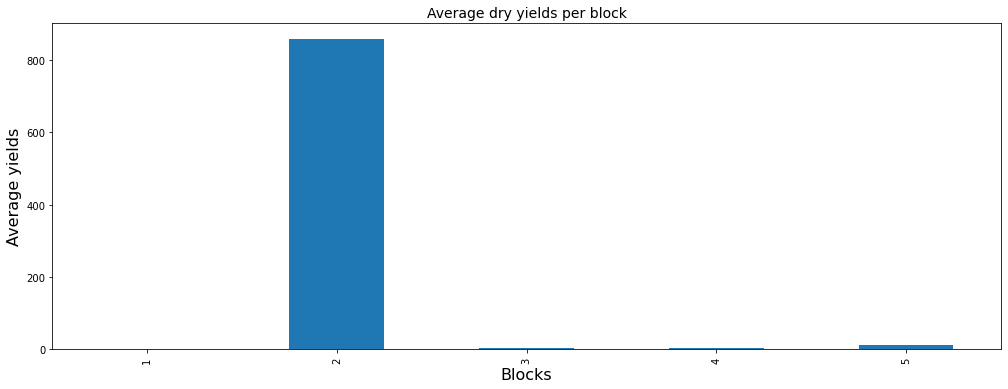

In [56]:
plt.figure(figsize = (17,6))
cleaned_payouts_calculated_data.groupby('farmers_block').mean()['crop_dry_weight'].plot.bar()
plt.title("Average dry yields per block",fontsize = 14)
plt.xlabel("Blocks",fontsize = 16);
plt.ylabel("Average yields",fontsize = 16);